In [1]:
using PyPlot

In [2]:
import MappingRobots

In [3]:
p = addprocs(["pi@pi3.local"], dir="/home/pi", exename="/usr/bin/julia")

1-element Array{Int64,1}:
 2

In [4]:
@everywhere import MappingRobots

CapturedException(MethodError(Base.set_valid_processes,(Int64[2],)),Any[]WARNING: deserialization checks failed while attempting to load cache from /Users/rdeits/.julia/lib/v0.4/MappingRobots.ji)


In [5]:
robot = @spawnat p[1] MappingRobots.Robot(MappingRobots.Brick("/home/pi/Ev3"))

RemoteRef{Channel{Any}}(2,1,3)

In [6]:
m = @spawnat p[1] MappingRobots.run_mapping(fetch(robot), timeout=MappingRobots.Second(60))
RemoteRef{Channel{Any}}(4,1,10)
local_map = fetch(m);

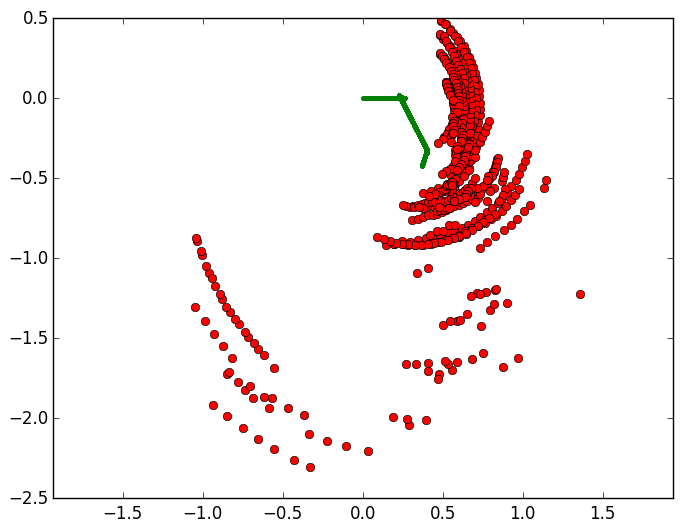

(-1.5,1.5,-2.5,0.5)

In [7]:
function draw(m::MappingRobots.Map)
    plot([x[1] for x in m.points], [x[2] for x in m.points], "ro")
    plot([x.offset[1] for x in m.path], [x.offset[2] for x in m.path], "g.-")
    axis("equal")
end

cla()
hold(true)
draw(local_map)
# for m in vcat(maps)
#     draw(m)
# end